In [55]:
%matplotlib inline

from pathlib import Path

import pandas as pd
import matplotlib.pylab as plt
import statsmodels.formula.api as sm
from statsmodels.tsa import tsatools
from dmba import regressionSummary

In [56]:
travel = pd.read_csv('Sept11Travel.csv', thousands =',')

In [57]:
travel.head()

,Month,Air RPM (000s),Rail PM,VMT (billions)
0,Jan-90,35153577,454115779,163.28
1,Feb-90,32965187,435086002,153.25
2,Mar-90,39993913,568289732,178.42
3,Apr-90,37981886,568101697,178.68
4,May-90,38419672,539628385,188.88


In [58]:
travel.dtypes

Month              object
Air RPM (000s)      int64
Rail PM             int64
VMT (billions)    float64
dtype: object

In [59]:
travel.shape

(172, 4)

The goal of this study is descriptive

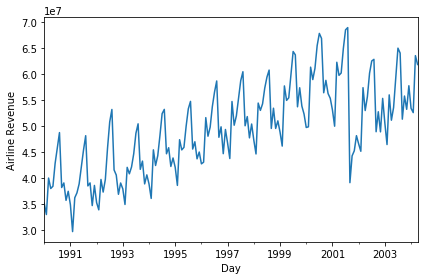

In [66]:
#convert the date information to a datetime object
travel['Date'] = pd.to_datetime(travel['Month'], format='%b-%y')

# convert dataframe column to series (name is used to label the data
Airline_Revenue = pd.Series(travel['Air RPM (000s)'].values, index = travel.Date, name ='Airline')

# define the time series frequency
Airline_Revenue.index = pd.DatetimeIndex(Airline_Revenue.index, freq = Airline_Revenue.index.inferred_freq)

#plot the series
ax = Airline_Revenue.plot()
ax.set_xlabel('Day')
ax.set_ylabel('Airline Revenue')
plt.tight_layout()

plt.show()

The time series above shows a trend with seasonal pattern. There was a sharp decline in airtravel towards the end of 2001 due to the US terrorist attack.

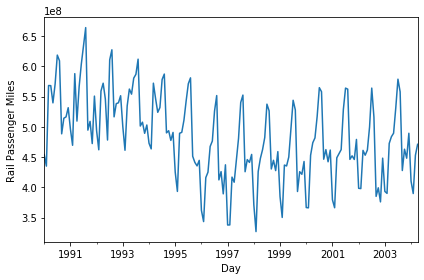

In [67]:
#convert the date information to a datetime object
travel['Date'] = pd.to_datetime(travel['Month'], format='%b-%y')

# convert dataframe column to series (name is used to label the data
Rail_Pass = pd.Series(travel['Rail PM'].values, index = travel.Date, name ='Rail')

# define the time series frequency
Rail_Pass.index = pd.DatetimeIndex(Rail_Pass.index, freq = Rail_Pass.index.inferred_freq)

#plot the series
ax = Rail_Pass.plot()
ax.set_xlabel('Day')
ax.set_ylabel('Rail Passenger Miles')
plt.tight_layout()

plt.show()

The time series above shows seasonal pattern.

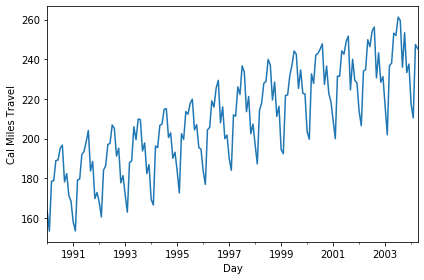

In [68]:
#convert the date information to a datetime object
travel['Date'] = pd.to_datetime(travel['Month'], format='%b-%y')

# convert dataframe column to series (name is used to label the data
Vehicle_Travel = pd.Series(travel['VMT (billions)'].values, index = travel.Date, name ='Vehicle')

# define the time series frequency
Vehicle_Travel.index = pd.DatetimeIndex(Vehicle_Travel.index, freq = Vehicle_Travel.index.inferred_freq)

#plot the series
ax = Vehicle_Travel.plot()
ax.set_xlabel('Day')
ax.set_ylabel('Cal Miles Travel')
plt.tight_layout()

plt.show()

The time series above shows a consistent trend with seasonal pattern.

ii. What type of trend appears? Change the scale of the series, add trendlines and suppress seasonality to better visualize the trend pattern.

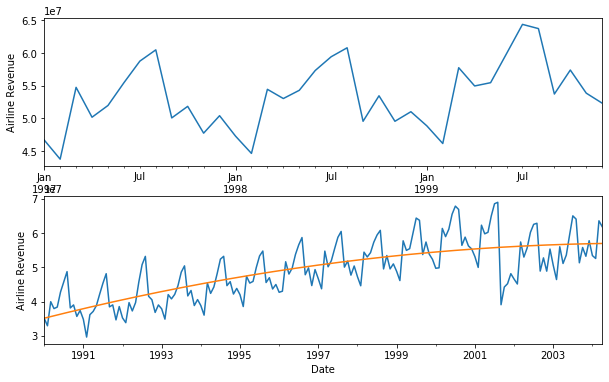

In [76]:
# create short time series from 1997 to 1999 using a slice 
air_ts_3yrs = Airline_Revenue['1997':'1999']

# create a data frame with additional independent variables from time series
# the following command adds a constant term, a trend term and a quadratic trend term
airline_df = tsatools.add_trend(Airline_Revenue, trend='ctt')
# fit a linear regression model to the time series
airline_lm = sm.ols(formula='Airline ~ trend + trend_squared', data=airline_df).fit()

# shorter and longer time series
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10,6))
air_ts_3yrs.plot(ax=axes[0])
Airline_Revenue.plot(ax=axes[1])
for ax in axes:
    ax.set_xlabel('Time')
    ax.set_ylabel('Airline Revenue')
airline_lm.predict(airline_df).plot(ax=axes[1])
plt.show()

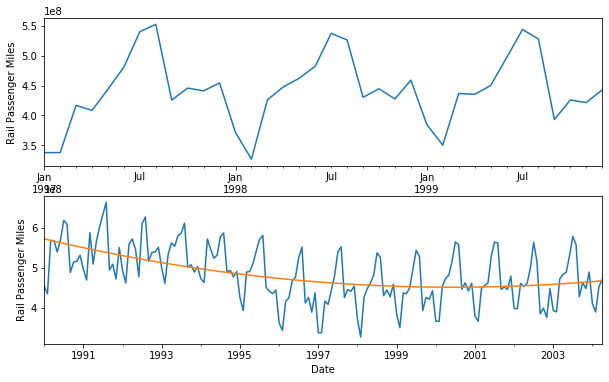

In [79]:
# create short time series from 1997 to 1999 using a slice 
rail_ts_3yrs = Rail_Pass['1997':'1999']

# create a data frame with additional independent variables from time series
# the following command adds a constant term, a trend term and a quadratic trend term
rail_df = tsatools.add_trend(Rail_Pass, trend='ctt')
# fit a linear regression model to the time series
rail_lm = sm.ols(formula='Rail ~ trend + trend_squared', data=rail_df).fit()

# shorter and longer time series
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10,6))
rail_ts_3yrs.plot(ax=axes[0])
Rail_Pass.plot(ax=axes[1])
for ax in axes:
    ax.set_xlabel('Time')
    ax.set_ylabel('Rail Passenger Miles')
rail_lm.predict(rail_df).plot(ax=axes[1])
plt.show()

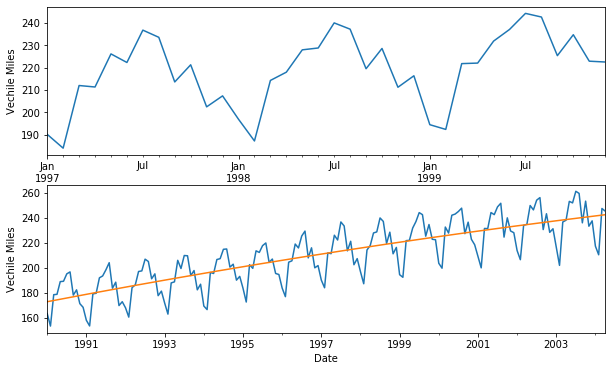

In [82]:
# create short time series from 1997 to 1999 using a slice 
car_ts_3yrs = Vehicle_Travel['1997':'1999']

# create a data frame with additional independent variables from time series
# the following command adds a constant term, a trend term and a quadratic trend term
car_df = tsatools.add_trend(Vehicle_Travel, trend='ctt')
# fit a linear regression model to the time series
car_lm = sm.ols(formula='Vehicle ~ trend + trend_squared', data=car_df).fit()

# shorter and longer time series
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10,6))
car_ts_3yrs.plot(ax=axes[0])
Vehicle_Travel.plot(ax=axes[1])
for ax in axes:
    ax.set_xlabel('Time')
    ax.set_ylabel('Vechile Miles')
car_lm.predict(car_df).plot(ax=axes[1])
plt.show()

Model A(Training Set): 543
Model A(Validation Set): 690
    
Model B(Training Set): 669
Model B(Validation Set): 675

Model A appears more useful for explaining the different components of this time series. Reason: It has a lower RMSE score on the training data and that means it fits the training set much better than model B.

Model B appears to be more useful for forecasting purposes. Reason: The RMSE score of the validation set is not too high when compared with that of the training set. Remember, the lower the RMSE score on the validation set, the better the performance of the model. 